# K-Means from Scratch

- We use K-Means to cluster unlabeled data into _K_ groups.
- We decide the number of different cluster centers _K_, and our decision rule assigns $x_i$ to its nearest (Euclidean Distance typically) cluster center. 
- Our objective is to find a combination of clusters that minimizes the euclidean distance of our data points from its closest cluster centers.

- In the code, we will use the _Spending Score_ and _Annual incomes_ of the dataset 'Mall_Customers.csv'. 
- We will try to find and predict clusters and their centers for this data to classify our points into _K_ different groups. 

- Reference: https://medium.com/machine-learning-algorithms-from-scratch/k-means-clustering-from-scratch-in-python-1675d38eee42


### PSEUDO CODE:

- Have a look at the data: plot the data and have an intuitive of how many cluster we have (This is called Explorative Data Analysis), or  do some cross-validation to find optimal K.
- Set the number of clusters (k)
- Initialize centroids randomly

Iterate:
- Classify points into different clusters: by choosing the cluster with center closest to each point 
- Compute the new centroids

Step 1 Import Libraries

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random as rd
from collections import defaultdict # directory-like object
import matplotlib.cm as cm

plt.rcParams['figure.figsize'] = (10.0, 7.0)

We first load the data and focus only on _Annual Income_ and _Spending Score_

Step 2 Load the dataset:

In [9]:
#Read the dataset
dataset=pd.read_csv('Mall_Customers.csv')
X = dataset.iloc[:, [3, 4]].values
print(X.shape)

(200, 2)


[]

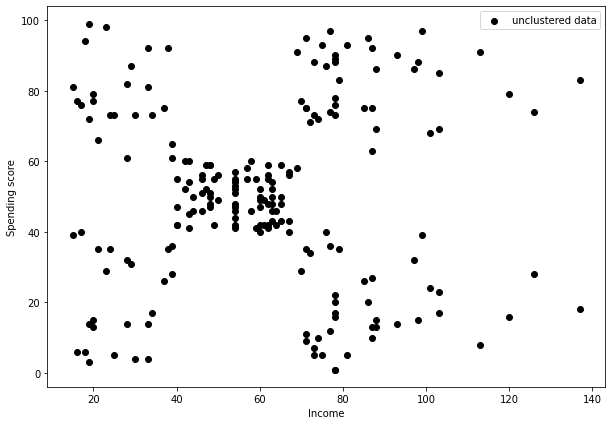

In [10]:
#Visualize the dataset
plt.xlabel('Income')
plt.ylabel('Spending score')
plt.scatter(X[:,0], X[:,1], c='black', label='unclustered data')
plt.legend()
plt.plot()

Step 3 Initialize the Cluster Centers / Centroids

Shape of Centroids: (2, 5)

Centroids chosen randomly: 
[[ 34.  65.  65. 126.  39.]
 [ 73.  59.  43.  74.  28.]] 



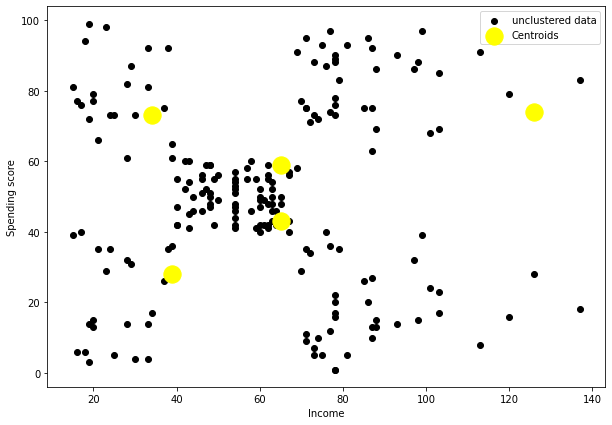

In [11]:
#Set the number of clusters
K=5


#number of training examples
m=X.shape[0]


#centroids of our clusters
Centroids=np.array([]).reshape(2,0) #column vector of shape(2,0)

rd.seed(100)
for i in range(K): #initialize our centroids randomly
    rand=rd.randint(0,m-1)
    Centroids=np.c_[Centroids,X[rand]]

    
print(f"Shape of Centroids: {Centroids.shape}\n")
print(f"Centroids chosen randomly: \n{Centroids} \n")


#Visualize the randomly initialized centroid values
plt.xlabel('Income')
plt.ylabel('Spending score')
plt.scatter(X[:,0], X[:,1], c='black', label='unclustered data')
plt.scatter(Centroids[0,:], Centroids[1,:], s=300,c='yellow',label='Centroids')
plt.legend()
plt.show()

For each example in our dataset, we will 
- find the distances from each point each cluster center,
- assign each point a cluster closest to it
- update the centroids

Step 4 K-Means Algorithm:

Shape of Euclidean Distance:  (200, 5)
Shape of C:  (200,)
 
Values of Dictionary Y:
{1: array([], shape=(2, 0), dtype=float64), 2: array([], shape=(2, 0), dtype=float64), 3: array([], shape=(2, 0), dtype=float64), 4: array([], shape=(2, 0), dtype=float64), 5: array([], shape=(2, 0), dtype=float64)}
 
Structure of the dictionary Y:
1 (2, 28)
2 (2, 58)
3 (2, 71)
4 (2, 14)
5 (2, 29)


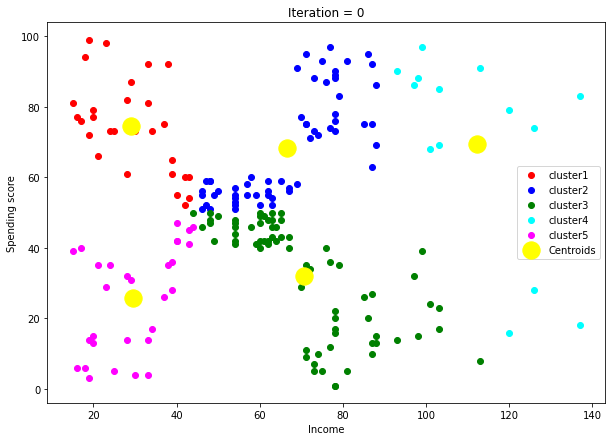

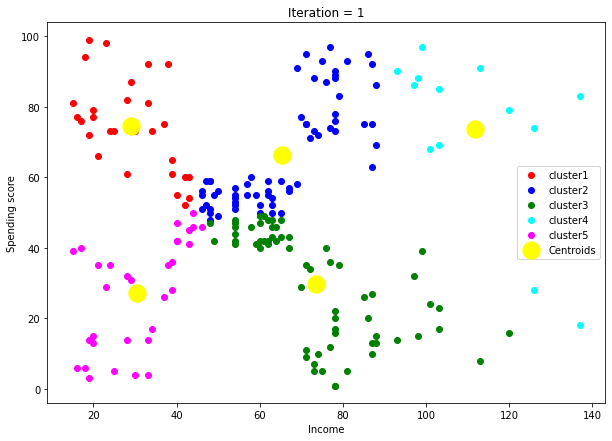

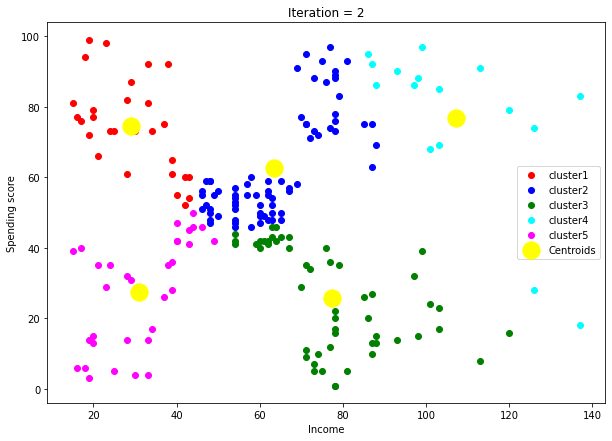

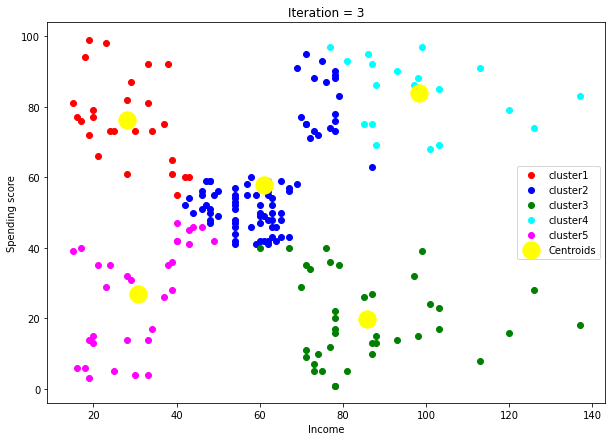

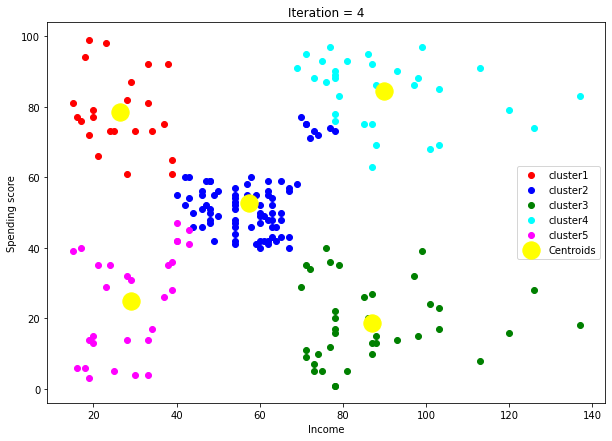

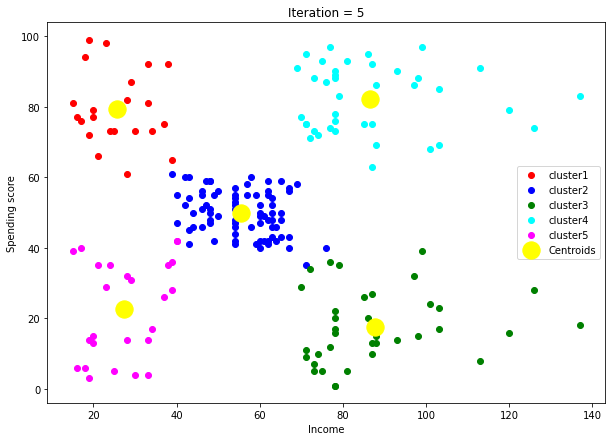

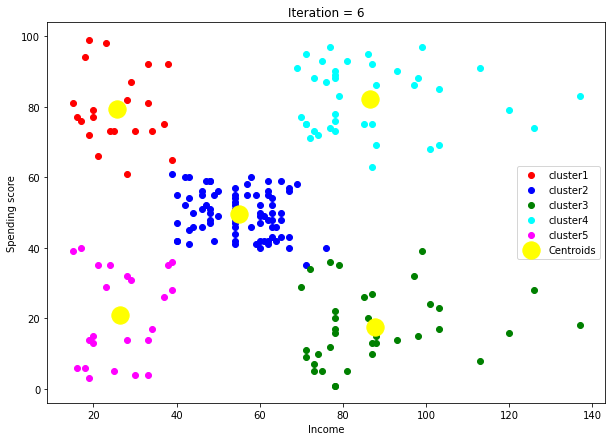

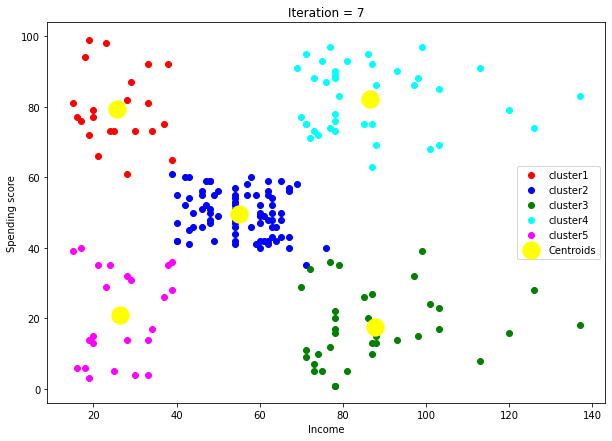

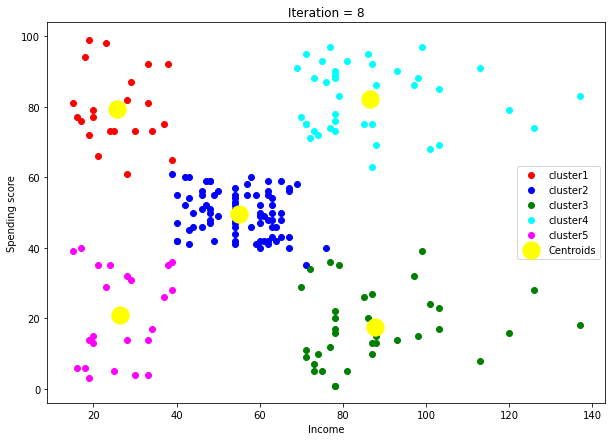

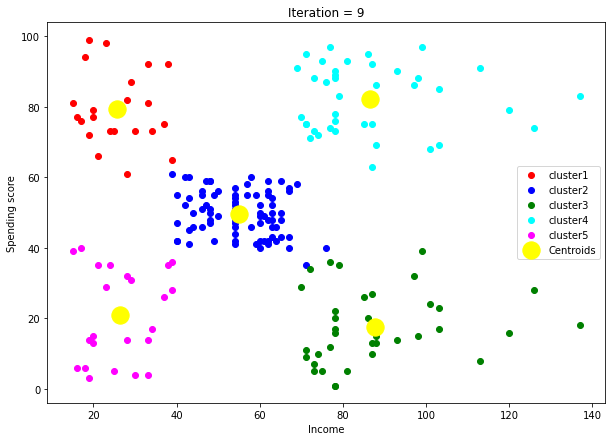

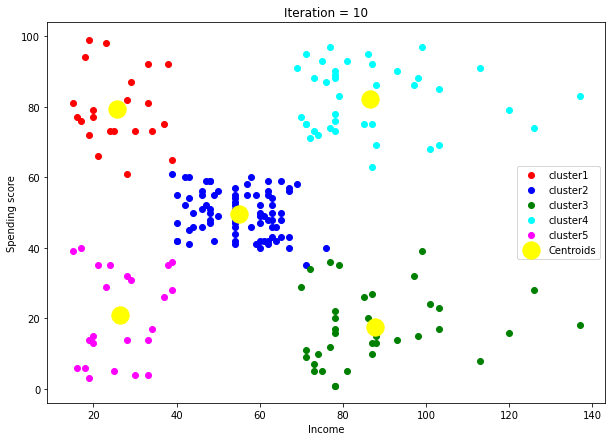

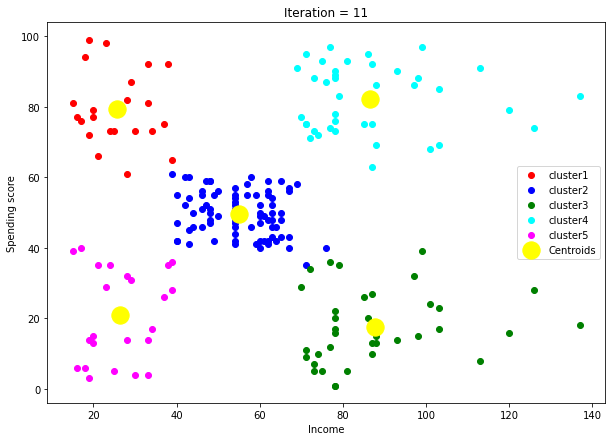

In [12]:
# No of iterations
num_iter=20

# Toggle to control visualization
# vis_toggle = False
vis_toggle = True

Output=defaultdict()


# Initialize an empty dictionary to store the coordinates for each cluster
Output={}


#we repeat this process many times so we can get as accurate a cluster center as possible
for n in range(num_iter): 
        
    
    # 1] Store distances of the data points from all the centroids
    EuclideanDistance=np.array([]).reshape(m,0) 
    
    for k in range(K):
        tempDist=np.sum((X-Centroids[:,k])**2,axis=1)
        EuclideanDistance=np.c_[EuclideanDistance,tempDist]
        
    if n==0:
        print("Shape of Euclidean Distance: ", EuclideanDistance.shape)        
    # Shape of Euclidean Distance = (m,k) = (200,5) - Corresponds to distance of training example from each centroid


    # 2] Gets minimum of all distances found and assigns a number between 1 and 5 to each training example
    
    # Assign cluster according to Euclidean distance
    C=np.argmin(EuclideanDistance,axis=1)+1  # +1 because argument starting from 0
    
    # We have now assigned each point to a centroid

    
    if n==0:
        print("Shape of C: ",C.shape) 
    # Shape of C: (200,1)   
    
    
        
    # 3] Initialize dictionary to store (x,y) coordinates for each point
    Y={}
    
    # clusters 1,2,3,4,5 with corresponding points
    for k in range(K): # make each entry to 2*0 shape for later storing points
        Y[k+1]=np.array([]).reshape(2,0)
        
    
    # Visualize the Dictionary that stores the centoid values
    if n==0:
        print(" ")
        print("Values of Dictionary Y:")
        print(Y)
        
    
    # 4] For each training instance, we store it's coorinates in the category allocated to it 
    # (print values of C to visualize) 
    
    for i in range(m):
        Y[C[i]]=np.c_[Y[C[i]],X[i]] # C[i] : number between 1 and 5, the 'key' of Y
          
            
    # Visualize the dictionary Y
    if n==0:
        print(" ")
        print("Structure of the dictionary Y:")
        for key, value in Y.items() :
            print (key, value.shape)
    
    # Change shape of dictionary values
    for k in range(K):
        Y[k+1]=Y[k+1].T
        
        
    # 5] Update the centroids, 
    for k in range(K):
        Centroids[:,k]=np.mean(Y[k+1],axis=0)
    #Shape of Centroids: (2,5)       
    
    
    color=['red','blue','green','cyan','magenta','yellow','orange','purple']
    labels=['cluster1','cluster2','cluster3','cluster4','cluster5','cluster6','cluster7','cluster8']


    # This a grouping of our data to its appropriate cluster
    Output=Y 

    
    # Vizualize what is happening in each iteration if vis_toggle is True
    #if vis_toggle and n%50==0:
    if vis_toggle and n<12:
        title = 'Iteration = '+str(n)
        plt.title(title)
        
        for k in range(K):
            plt.scatter(Output[k+1][:,0],Output[k+1][:,1],c=color[k],label=labels[k])

        plt.scatter(Centroids[0,:],Centroids[1,:],s=300,c='yellow',label='Centroids')
        plt.xlabel('Income')
        plt.ylabel('Spending score')
        plt.legend()
        #save_name= 'img'+str(n)+'.png'
        #plt.savefig(save_name)
        plt.show()


Plot our color-coded data with defined cluster centers

5] Plot the final clusters

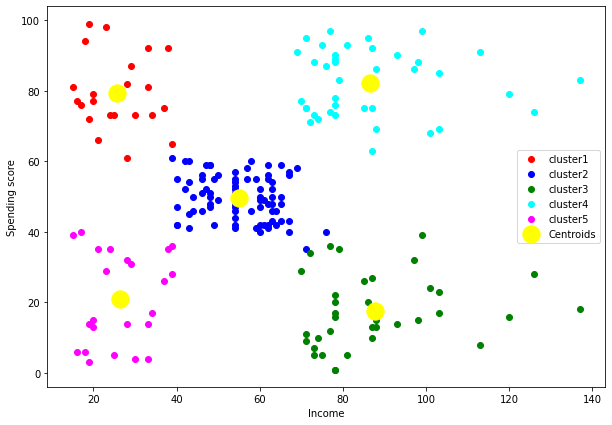

In [13]:
#Final Output:

color=['red','blue','green','cyan','magenta','yellow','orange','purple']
labels=['cluster1','cluster2','cluster3','cluster4','cluster5','cluster6','cluster7','cluster8']

for k in range(K):
    plt.scatter(Output[k+1][:,0],Output[k+1][:,1],c=color[k],label=labels[k])
    
plt.scatter(Centroids[0,:],Centroids[1,:],s=300,c='yellow',label='Centroids')
plt.xlabel('Income')
plt.ylabel('Spending score')
plt.legend()
plt.show()

(2, 5)


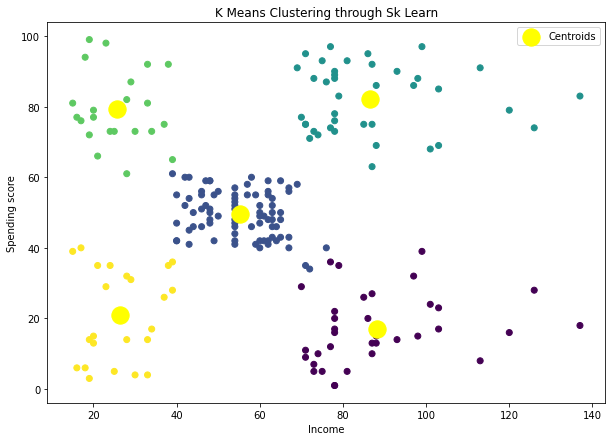

C:\Users\THINKPAD\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


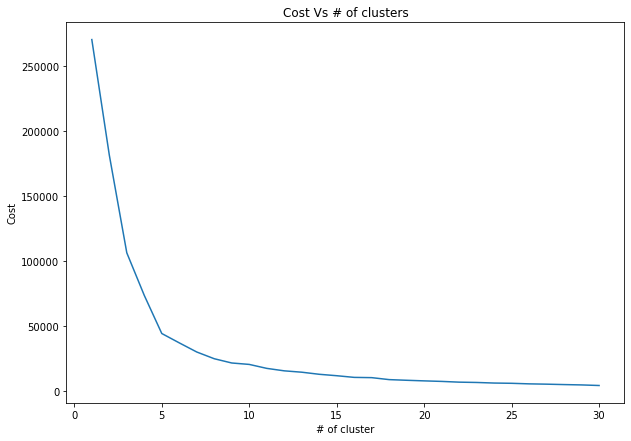

In [14]:
#Using kmeans sk learn with random centroid initialization
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=0).fit(X)
labels = kmeans.labels_
Centroids = np.transpose(kmeans.cluster_centers_)
print(np.shape(Centroids))
Score = kmeans.score(X)


#Visualize
plt.xlabel('Income')
plt.ylabel('Spending score')
plt.scatter(X[:,0], X[:,1], c=labels)
plt.scatter(Centroids[0,:], Centroids[1,:], s=300,c='yellow',label='Centroids')
plt.legend()
plt.title('K Means Clustering through Sk Learn')
plt.show()

Score = []
clusters = []
for i in range(30):
    kmeans = KMeans(n_clusters=i+1, random_state=0).fit(X)
    Score.append(-kmeans.score(X))
    clusters.append(i+1)

plt.xlabel('# of cluster')
plt.ylabel('Cost')
plt.plot(clusters,Score)
plt.title('Cost Vs # of clusters')
plt.show()
